In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib import pylab as plt
import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
print(df['StandardHours'].value_counts())

80    1470
Name: StandardHours, dtype: int64


In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Zero Variance Check

In [6]:
df.nunique().nsmallest(10)

EmployeeCount        1
Over18               1
StandardHours        1
Attrition            2
Gender               2
OverTime             2
PerformanceRating    2
BusinessTravel       3
Department           3
MaritalStatus        3
dtype: int64

In [7]:
df = df.drop(['EmployeeCount','StandardHours','Over18'], axis=1)

**1. basic**

In [8]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [9]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
df.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


# Missing value Check

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Duplicate Check

In [12]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


# Correlation Check¶ - (delete variable)

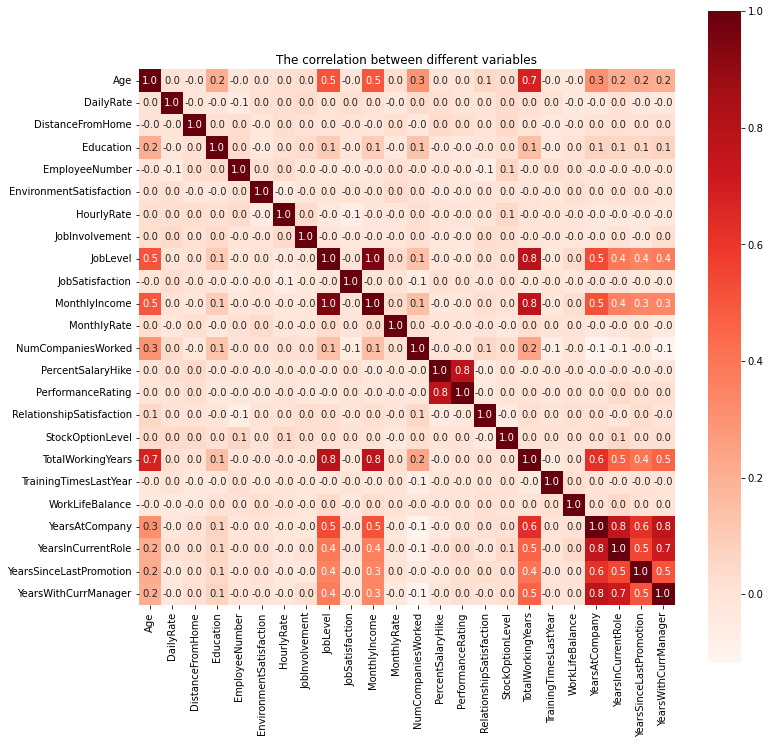

In [13]:
corr = df.corr()
plt.figure(figsize=(12,12))
ax = plt.axes()
hmap = sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')
figure = hmap.get_figure()
ax.set_title("The correlation between different variables")
figure.savefig(r'../figures/correaltion_matrix1.png', dpi=300,)

In [14]:
df_corr = df[['JobLevel','TotalWorkingYears','MonthlyIncome','YearsInCurrentRole', 'YearsWithCurrManager','YearsAtCompany' ]]

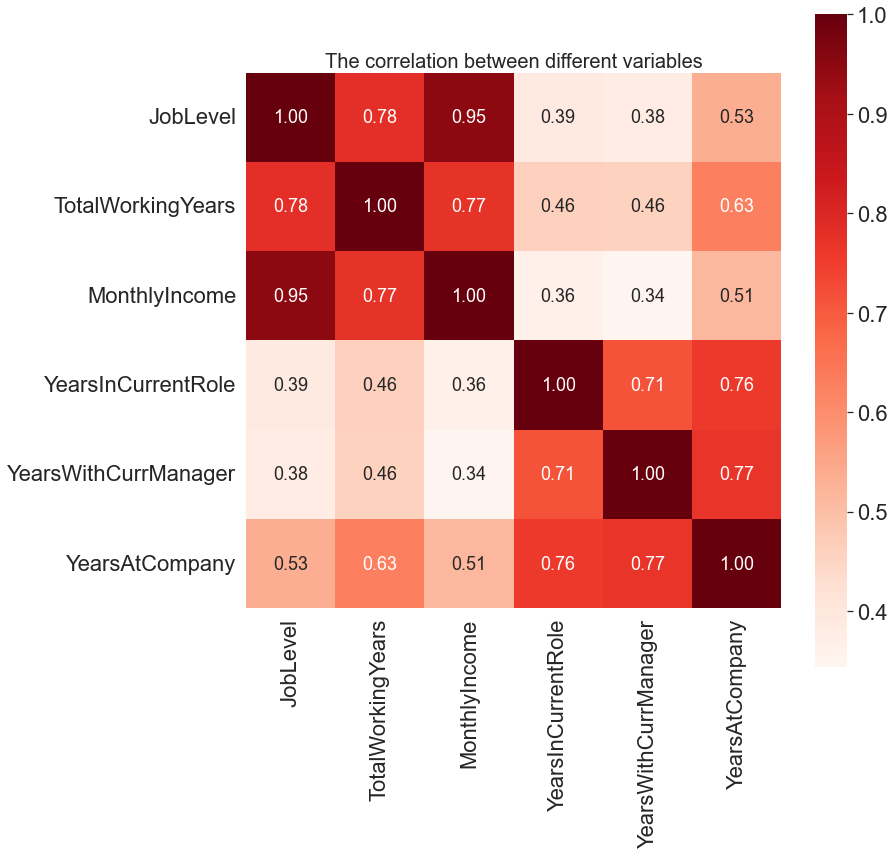

In [51]:
corr = df_corr.corr()
plt.figure(figsize=(12,12))
ax = plt.axes()
hmap = sns.heatmap(corr,cbar=True,square=True,fmt='.2f',annot=True,cmap='Reds',annot_kws={"fontsize":18})

figure = hmap.get_figure()
ax.set_title("The correlation between different variables",fontsize = 20)
sns.set(font_scale=1)
figure.savefig(f'../figures/correaltion_matrix_high.png', dpi=300, bbox_inches='tight')

From the figure above we summarize several initial patterns:
1. Employees with higher PerformanceRating are more likely to get larger raises in
salaries.
2. TotalWorkingYear, YearsInCurrentRole and YearsInCompany are all highly positive
correlated. But they do not have significant influence on other variables.


# Visualize the target variable：Check the balance

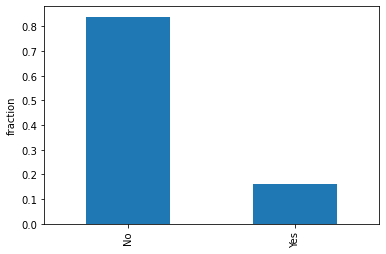

In [16]:
from matplotlib import pylab as plt

pd.value_counts(df['Attrition'],normalize=True).plot.bar()
plt.ylabel('fraction')

plt.savefig(f'../figures/imbalance.png', dpi=300)
plt.text(.05,.05,'')
plt.show()

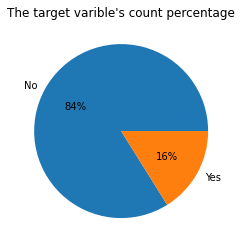

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.pie(df['Attrition'].value_counts()/len(df),labels = ['No','Yes'], autopct='%.0f%%')
plt.title("The target varible's count percentage")

plt.savefig('../figures/imbalance-pie.png', dpi=300)
plt.show()

In [18]:
print(df['Attrition'].value_counts()/len(df))

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


In [19]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

**2.EDA**

In [20]:
numCols = df.select_dtypes([np.number]).columns
numCols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

The dataset has 1470 observations with 26 numerical variables
and 9 categorical variables. Among the data, 1237 (84%) observations choose not to leave
the company, showing the dataset is unbalanced.

In [22]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

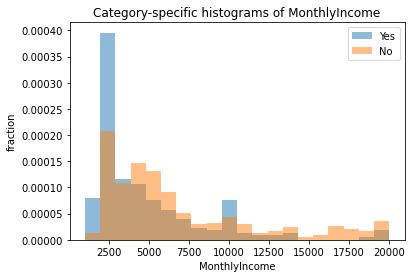

In [23]:
import matplotlib
from matplotlib import pylab as plt

categories = df['Attrition'].unique()
bin_range = (df['MonthlyIncome'].min(),df['MonthlyIncome'].max())

for c in categories:
    plt.hist(df[df['Attrition']==c]['MonthlyIncome'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('MonthlyIncome')
plt.title('Category-specific histograms of MonthlyIncome')
plt.savefig('../figures/Category-specific histograms of MonthlyIncome.png', dpi=300)
plt.show()

<Figure size 648x792 with 0 Axes>

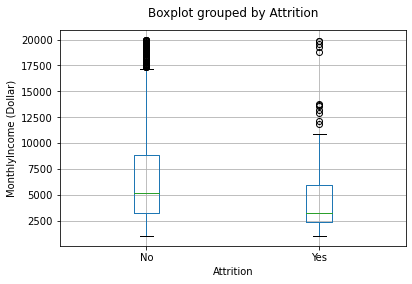

In [24]:
fig = plt.figure(figsize=(9, 11))
df[['MonthlyIncome','Attrition']].boxplot(by='Attrition')
plt.ylabel('MonthlyIncome (Dollar)')
plt.xlabel('Attrition')
plt.title(' ')

plt.savefig('../figures/boxplot.png', dpi=300,bbox_inches='tight')
plt.show()

In [25]:
count_matrix = df.groupby(['JobRole', 'Attrition']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Attrition                        No       Yes
JobRole                                      
Healthcare Representative  0.931298  0.068702
Human Resources            0.769231  0.230769
Laboratory Technician      0.760618  0.239382
Manager                    0.950980  0.049020
Manufacturing Director     0.931034  0.068966
Research Director          0.975000  0.025000
Research Scientist         0.839041  0.160959
Sales Executive            0.825153  0.174847
Sales Representative       0.602410  0.397590


<Figure size 360x216 with 0 Axes>

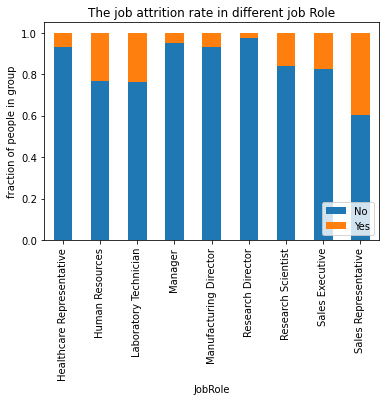

In [26]:
plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.title('The job attrition rate in different job Role')
plt.savefig('../figures/bar.png', dpi=300,bbox_inches='tight')

plt.show()

In [233]:
count_matrix = df.groupby(['BusinessTravel', 'Attrition']).size().unstack()
#print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569


Most employees who travel rarely don't leave the company. From the plot we can tell, sending employees on business travels or not doesn't really make much of a difference and doesn't have a significant effect on attrition.

**Data preprocessing**

In [84]:
print(df['Attrition'].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


In [85]:
# baseline f-score
#n0： in class 0
#p = tp/(tp+fp) = n1/n
#r = tp/(tp+fn) = 1
#f1 = 2pr/(p+r) = 2p/(p+1)


p = 237/(1223+237)

baseline =2*p/(p+1)

baseline

0.2793164407778433

In [12]:
X = df.drop(columns = ['Attrition'])
y = df[['Attrition']]

std_ftrs = ['Age','DailyRate', 'DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked', 'YearsAtCompany','YearsSinceLastPromotion','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager','PercentSalaryHike','EmployeeNumber']
ordinal_ftrs = ['Education', 'EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear','WorkLifeBalance','JobLevel']
ordinal_cats =[['1','2','3','4','5'],['1','2','3','4'],['1','2','3','4'],['1','2','3','4'],['1','2','3','4'],['1','2','3','4'],['0','1','2','3'],['0','1','2','3','4','5','6'],['1','2','3','4'],['1','2','3','4','5']]
onehot_ftrs = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

# all the same up to this point

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
def MLpipe_StratifiedKFoldf2(X, y, preprocessor, ML_algo, param_grid):

    random_state = [1,6,15,19,30,28]
    test_scores = np.zeros(len(random_state))
    best_models = []
    total_grid = []
    for i in range(len(random_state)):
        print('random_state：', random_state[i])
        X_other, X_test, y_other, y_test = train_test_split(X, y, stratify=y,
                                                            train_size = 0.8, 
                                                            random_state = random_state[i])
        kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=i)

        pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                     ('Classifier', ML_algo)])

        grid = GridSearchCV(pipeline, param_grid = param_grid, 
                          cv = kf, return_train_score = True,
                          scoring = make_scorer(fbeta_score, pos_label='Yes', beta=1
                                                  ))
        
        
        grid.fit(X_other, y_other.values.ravel())
        
        results = pd.DataFrame(grid.cv_results_)
        best_estimator = grid.best_estimator_
        best_params = grid.best_params_
        

        best_models.append(best_estimator)
        total_grid.append(grid)


    # calculate and save the test score
        y_test_pred = total_grid[-1].predict(X_test)
        
        test_scores[i] = fbeta_score(y_test, y_test_pred, pos_label='Yes', beta=1)
        print('test score:',test_scores[i])

            
        feature_names = grid.best_estimator_[0].get_feature_names_out()
        

    return best_models, test_scores,grid, X_test, y_test,feature_names,total_grid

In [32]:
print("baseline: mean:", np.mean(scores_Dummy), ", std:", np.std(scores_Dummy))
mean_baseline = np.mean(scores_Dummy)
std_baseline = np.std(scores_Dummy)

baseline: mean: 0.2756598240469208 , std: 0.0


In [68]:
(mean_XGB-baseline)/std_XGB

8.116847140343552

In [20]:
from  sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
param_grid = {
              'Classifier__max_depth': [15,30,50],
              'Classifier__max_features': np.arange(0.1, 1, 0.2)
              }



ML_algo = RandomForestClassifier()
best_models_RF, scores_RF,grid_RF, X_test_RF, y_test_RF,feature_names_RF, total_grid_RF = MLpipe_StratifiedKFoldf2(X, y, preprocessor, ML_algo, param_grid)




random_state： 1
test score: 0.4242424242424243
random_state： 6
test score: 0.4657534246575342
random_state： 15
test score: 0.3636363636363636
random_state： 19
test score: 0.36923076923076914
random_state： 30
test score: 0.393939393939394
random_state： 28
test score: 0.2985074626865672


In [71]:
print("RF: mean:", np.mean(scores_RF), ", std:", np.std(scores_RF))
mean_RF = np.mean(scores_RF)
std_RF = np.std(scores_RF)

RF: mean: 0.38050071767156884 , std: 0.056885160833700266


In [296]:

# save the output so I can use it later
import pickle
file = open('../results/rf.save','wb')
pickle.dump((best_models_RF, scores_RF,grid_RF, X_test_RF, y_test_RF,feature_names_RF, total_grid_RF),file)
file.close()

In [124]:
# train the XGBoost model
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

param_grid = {"Classifier__learning_rate": [0.1,0.3],
              
                  "Classifier__max_depth": [1,2],
                  "Classifier__colsample_bytree": [0.4,0.9],
                 "Classifier__eval_metric": ['mlogloss'],
              "Classifier__gamma":[0.4, 0.75,1],
                }
    
    
    
ML_algo = XGBClassifier()
best_models_XGB, scores_XGB,grid_XGB, X_test_XGB, y_test_XGB,feature_names_XGB,total_grid_XGB = MLpipe_StratifiedKFoldf2(X, y, preprocessor, ML_algo, param_grid)



random_state： 1
test score: 0.5679012345679013
random_state： 6
test score: 0.6075949367088608
random_state： 15
test score: 0.4999999999999999
random_state： 19
test score: 0.5316455696202532
random_state： 30
test score: 0.5789473684210527
random_state： 28
test score: 0.5641025641025641


In [125]:
print("XGB: mean:", np.mean(scores_XGB), ", std:", np.std(scores_XGB))
mean_XGB = np.mean(scores_XGB)
std_XGB = np.std(scores_XGB)

XGB: mean: 0.5583652789034387 , std: 0.03437896923531129


In [297]:

# save the output so I can use it later
import pickle
file = open('../results/XGB.save','wb')
pickle.dump((best_models_XGB, scores_XGB,grid_XGB, X_test_XGB, y_test_XGB,feature_names_XGB,total_grid_XGB),file)
file.close()

In [74]:
from  sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
param_grid = {'Classifier__alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2,1e-3]}
            

ML_algo = RidgeClassifier()
best_models_Ridge, scores_Ridge,grid_Ridge, X_test_Ridge, y_test_Ridge,feature_names_Ridge, total_grid_Ridge = MLpipe_StratifiedKFoldf2(X, y, preprocessor, ML_algo, param_grid)

random_state： 1
test score: 0.33333333333333337
random_state： 6
test score: 0.4615384615384616
random_state： 15
test score: 0.40624999999999994
random_state： 19
test score: 0.29032258064516125
random_state： 30
test score: 0.4516129032258065
random_state： 28
test score: 0.33333333333333337


In [75]:
print("Ridge: mean:", np.mean(scores_Ridge), ", std:", np.std(scores_Ridge))
mean_Ridge = np.mean(scores_Ridge)
std_Ridge = np.std(scores_Ridge)

Ridge: mean: 0.379398435346016 , std: 0.06437056125278275


In [298]:

# save the output so I can use it later
import pickle
file = open('../results/Ridge.save','wb')
pickle.dump((best_models_Ridge, scores_Ridge,grid_Ridge, X_test_Ridge, y_test_Ridge,feature_names_Ridge,total_grid_Ridge),file)
file.close()

In [77]:

param_grid = {'Classifier__C': [ 1 , 10 , 20 , 30 , 40 , 50 ],
             'Classifier__kernel': ['linear', 'poly', 'rbf','sigmoid'],
             'Classifier__degree': [1,2,3,4,5]}

ML_algo = SVC()
best_models_SVC, scores_SVC,grid_SVC, X_test_SVC, y_test_SVC,feature_names_SVC,grid_svc = MLpipe_StratifiedKFoldf2(X, y, preprocessor, ML_algo, param_grid)


random_state： 1
test score: 0.5316455696202532
random_state： 6
test score: 0.5783132530120482
random_state： 15
test score: 0.5135135135135135
random_state： 19
test score: 0.4507042253521127
random_state： 30
test score: 0.617283950617284
random_state： 28
test score: 0.5316455696202532


In [279]:
print("SVC: mean:", np.mean(scores_SVC), ", std:", np.std(scores_SVC))
mean_SVC = np.mean(scores_SVC)
std_SVC = np.std(scores_SVC)

SVC: mean: 0.5371843469559108 , std: 0.051974367588419744


In [299]:
# save the output so I can use it later
import pickle
file = open('../results/SVC.save','wb')
pickle.dump((best_models_SVC, scores_SVC,grid_SVC, X_test_SVC, y_test_SVC,feature_names_SVC,grid_svc ),file)
file.close()

In [81]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'Classifier__n_neighbors': np.arange(1,5,1),
              'Classifier__weights': ["uniform", "distance"]}

ML_algo = KNeighborsClassifier()
best_models_KNN, scores_KNN, grid_KNN, X_test_KNN, y_test_KNN,feature_names_KNN,grid_KNN = MLpipe_StratifiedKFoldf2(X, y, preprocessor, ML_algo, param_grid)


random_state： 1
test score: 0.3448275862068966
random_state： 6
test score: 0.3146067415730337
random_state： 15
test score: 0.22580645161290325
random_state： 19
test score: 0.30303030303030304
random_state： 30
test score: 0.3170731707317073
random_state： 28
test score: 0.2988505747126437


In [300]:
# save the output so I can use it later
import pickle
file = open('../results/KNN.save','wb')
pickle.dump((best_models_KNN, scores_KNN, grid_KNN, X_test_KNN, y_test_KNN,feature_names_KNN,grid_KNN),file)
file.close()

In [ ]:
grid_XGB.pr(X_test_XGB,y_test_XGB)

In [270]:

y_test_preds = grid_XGB.predict(X_test_XGB)

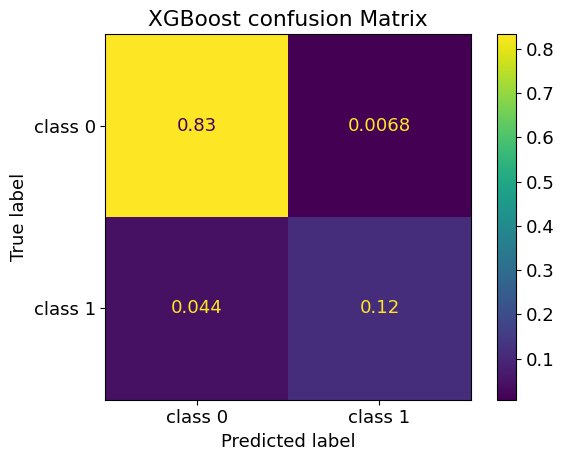

In [284]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# overall accuracy and confusion matrix
y_test_preds = total_grid_XGB[1].predict(X_test_XGB)
cm_overall = confusion_matrix(y_test_XGB, y_test_preds, normalize =  'all')
cm_overall_d = ConfusionMatrixDisplay(cm_overall,display_labels=['class 0', 'class 1'])
cm_overall_d.plot()
plt.title('XGBoost confusion Matrix')
plt.tight_layout()
plt.savefig('../figures/XGBoost confusion Matrix.png', dpi=300,bbox_inches='tight')

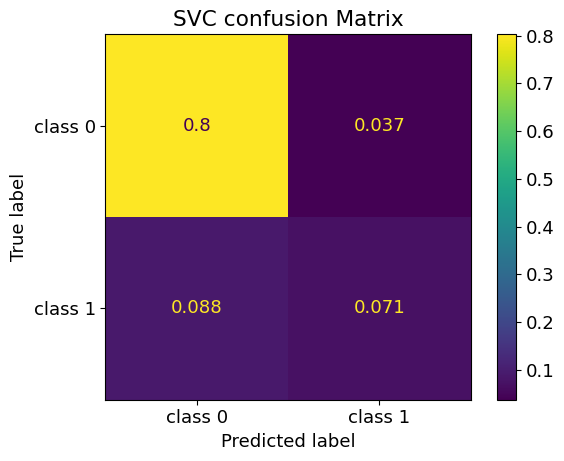

In [285]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# overall accuracy and confusion matrix
y_test_preds = grid_SVC.predict(X_test_SVC)
cm_overall = confusion_matrix(y_test_SVC, y_test_preds, normalize =  'all')
cm_overall_d = ConfusionMatrixDisplay(cm_overall,display_labels=['class 0', 'class 1'])
cm_overall_d.plot()
plt.title('SVC confusion Matrix')
plt.tight_layout()
plt.savefig('../figures/SVC confusion Matrix.png', dpi=300,bbox_inches='tight')

In [86]:
print("KNN: mean:", np.mean(scores_KNN), ", std:", np.std(scores_KNN))
mean_KNN = np.mean(scores_KNN)
std_KNN = np.std(scores_KNN)

KNN: mean: 0.30069913797791464 , std: 0.03657552988245541


In [258]:
Models = ['baseline','KNN','RF','Ridge', 'SVC','XGBoost']
x_pos = np.arange(len(Models))
means = [mean_baseline,mean_KNN,mean_RF, mean_Ridge, mean_SVC,mean_XGB]
error = [std_baseline,std_KNN,std_RF, std_Ridge,std_SVC,std_XGB]

In [260]:
error

[0.0,
 0.03657552988245541,
 0.056885160833700266,
 0.06437056125278275,
 0.051974367588419744,
 0.03437896923531129]

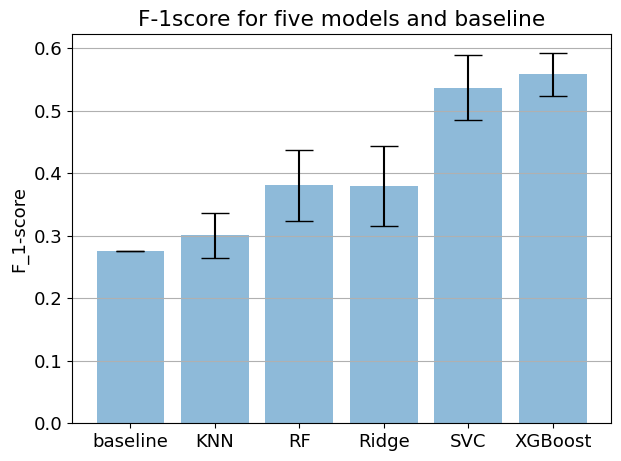

In [250]:
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('F_1-score')
ax.set_xticks(x_pos)
ax.set_xticklabels(Models)
ax.set_title('F-1score for five models and baseline')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('../figures/Accuracy_score_for_five_models.png', dpi=300,bbox_inches='tight')
plt.show()

## Permutation feature importance

In [99]:
ftr_names = X.columns

np.random.seed(42)

nr_runs = len(ftr_names)

scores = np.zeros([len(ftr_names),nr_runs])



for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    #loop through 7 best models to calculate the mean

    for j in range(nr_runs):
        X_test_shuffled = X_test_XGB.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test_XGB[ftr_names[i]].values)


        acc_scores.append(grid_XGB.score(X_test_shuffled,y_test_XGB))

        
        
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

shuffling Age
   shuffled test score: 0.516 +/- 0.028
shuffling BusinessTravel
   shuffled test score: 0.506 +/- 0.022
shuffling DailyRate
   shuffled test score: 0.564 +/- 0.016
shuffling Department
   shuffled test score: 0.546 +/- 0.015
shuffling DistanceFromHome
   shuffled test score: 0.505 +/- 0.026
shuffling Education
   shuffled test score: 0.56 +/- 0.011
shuffling EducationField
   shuffled test score: 0.557 +/- 0.014
shuffling EmployeeNumber
   shuffled test score: 0.548 +/- 0.018
shuffling EnvironmentSatisfaction
   shuffled test score: 0.489 +/- 0.026
shuffling Gender
   shuffled test score: 0.565 +/- 0.019
shuffling HourlyRate
   shuffled test score: 0.566 +/- 0.006
shuffling JobInvolvement
   shuffled test score: 0.528 +/- 0.021
shuffling JobLevel
   shuffled test score: 0.515 +/- 0.018
shuffling JobRole
   shuffled test score: 0.51 +/- 0.026
shuffling JobSatisfaction
   shuffled test score: 0.524 +/- 0.029
shuffling MaritalStatus
   shuffled test score: 0.553 +/- 0.019
s

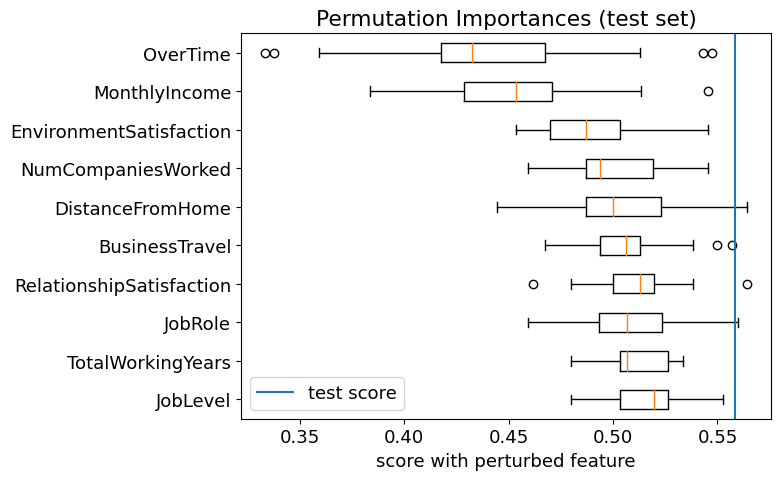

In [100]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(8,5))
plt.boxplot(scores[sorted_indcs[-10:]].T,labels=ftr_names[sorted_indcs[-10:]],vert=False)
plt.axvline(mean_XGB,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()

plt.savefig('../figures/Permutation_Importances.png', dpi=300,bbox_inches='tight')

plt.show()

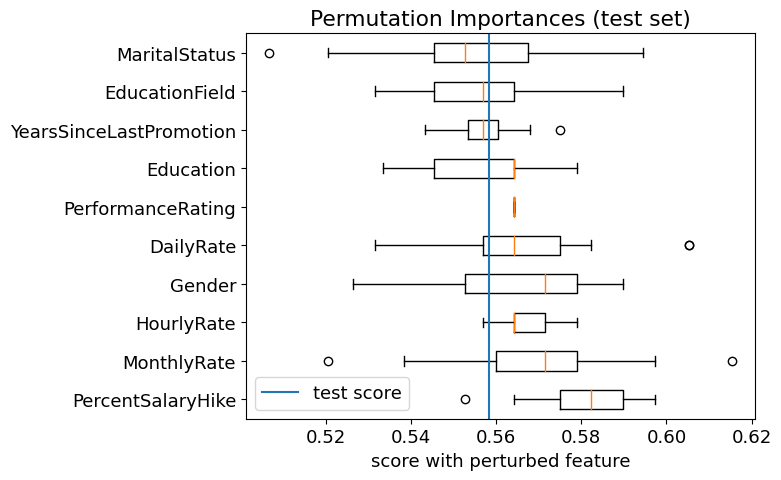

In [137]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(8,5))
plt.boxplot(scores[sorted_indcs[0:10]].T,labels=ftr_names[sorted_indcs[0:10]],vert=False)
plt.axvline(mean_XGB,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()

plt.savefig('../figures/Permutation_Importances.png', dpi=300,bbox_inches='tight')

plt.show()

In [181]:
len(feature_names_XGB)

52

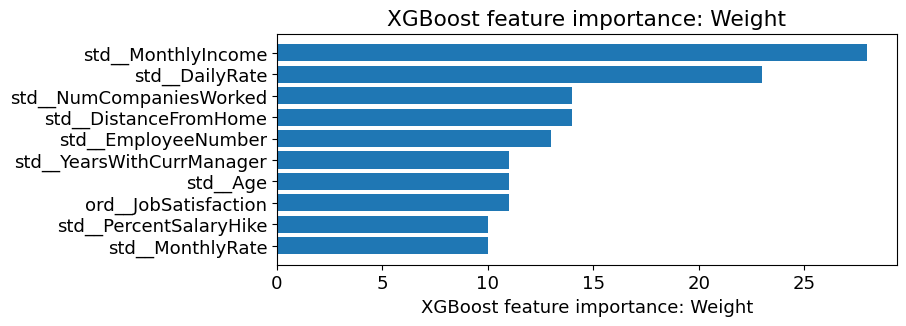

In [220]:
score = grid_XGB.best_estimator_.named_steps["Classifier"].get_booster().get_score(importance_type = 'weight').items()
score = list(score)
a = [[0]*2 for i in range(len(score))]
for i in range(len(score)):
    a[i][0] = feature_names_XGB[int(score[i][0].split('f')[1])]
    a[i][1] = score[i][1]
    
score = dict(sorted(a, key=lambda item: item[1]))

feature_names_sorted = list(score.keys())[-10:]
sum_list = list(score.values())[-10:]
plt.figure(figsize=(8,3))
plt.barh(feature_names_sorted, sum_list)
plt.xlabel('XGBoost feature importance: Weight')
plt.title('XGBoost feature importance: Weight')
plt.savefig('../figures/XGB-Weight.png', dpi=300,bbox_inches='tight')
plt.show()


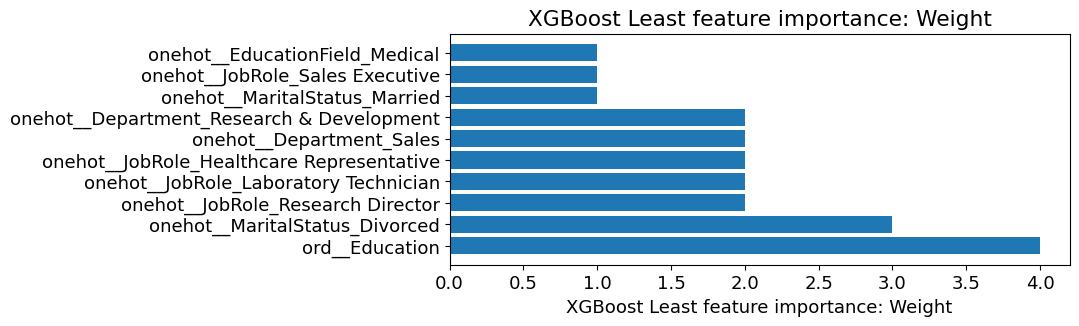

In [221]:
score = grid_XGB.best_estimator_.named_steps["Classifier"].get_booster().get_score(importance_type = 'weight').items()
score = list(score)
a = [[0]*2 for i in range(len(score))]
for i in range(len(score)):
    a[i][0] = feature_names_XGB[int(score[i][0].split('f')[1])]
    a[i][1] = score[i][1]
    
score = dict(sorted(a, key=lambda item: item[1])[::-1])

feature_names_sorted = list(score.keys())[-10:]
sum_list = list(score.values())[-10:]
plt.figure(figsize=(8,3))
plt.barh(feature_names_sorted, sum_list)
plt.xlabel('XGBoost Least feature importance: Weight')
plt.title('XGBoost Least feature importance: Weight')
plt.savefig('../figures/XGB-least-Weight.png', dpi=300,bbox_inches='tight')
plt.show()

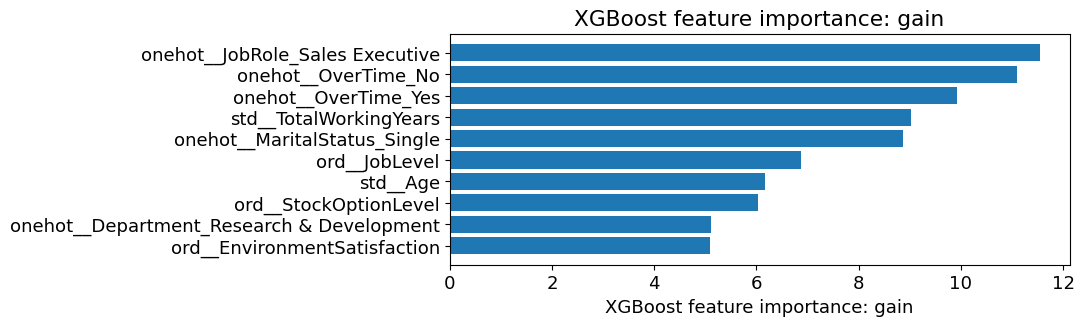

In [216]:
score = grid_XGB.best_estimator_.named_steps["Classifier"].get_booster().get_score(importance_type = 'gain').items()
score = list(score)
a = [[0]*2 for i in range(len(score))]
for i in range(len(score)):
    a[i][0] = feature_names_XGB[int(score[i][0].split('f')[1])]
    a[i][1] = score[i][1]
    
score = dict(sorted(a, key=lambda item: item[1]))

feature_names_sorted = list(score.keys())[-10:]
sum_list = list(score.values())[-10:]
plt.figure(figsize=(8,3))
plt.barh(feature_names_sorted, sum_list)
plt.xlabel('XGBoost feature importance: gain')
plt.title('XGBoost feature importance: gain')
plt.savefig('../figures/XGB-gain.png', dpi=300,bbox_inches='tight')
plt.show()

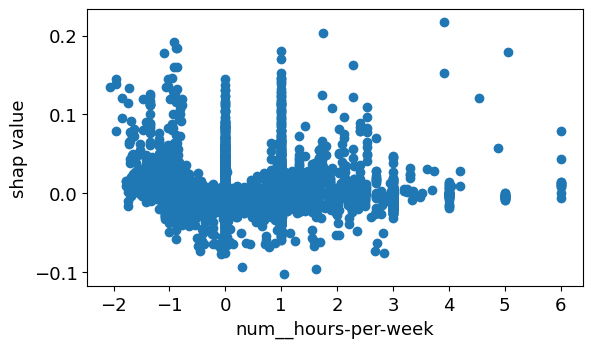

In [110]:
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
ftr = 'num__hours-per-week'
indx = np.argwhere(feature_names_RF==ftr)
plt.figure(figsize=(6.4,3.6))
plt.scatter(X_test_transformed,shap_values[1])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.show()

(294, 52)
(294, 52)


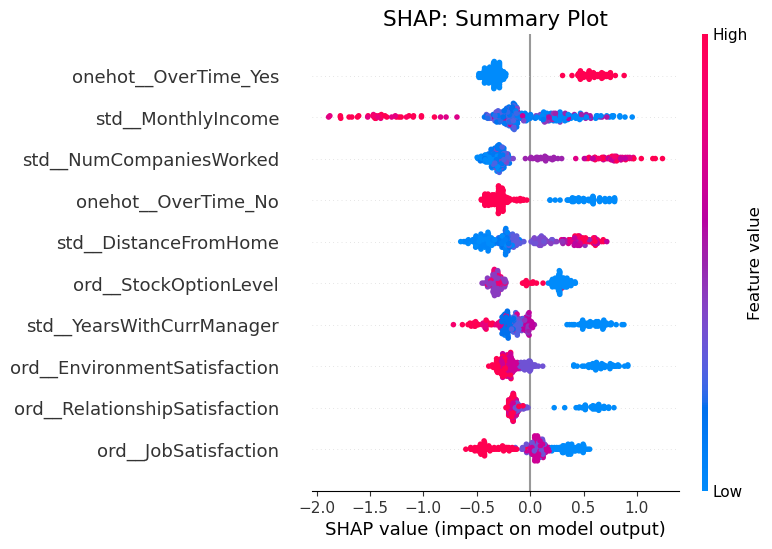

In [301]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid_XGB.best_estimator_[1])
# transform the test set
X_test_transformed = grid_XGB.best_estimator_[0].transform(X_test_XGB)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))

shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names_RF,max_display=10,show = False)
plt.title('SHAP: Summary Plot')
plt.savefig('../figures/shap-global.png', dpi=300,bbox_inches='tight')

plt.show()

In [236]:
feature_names_XGB

array(['ord__Education', 'ord__EnvironmentSatisfaction',
       'ord__JobInvolvement', 'ord__JobSatisfaction',
       'ord__PerformanceRating', 'ord__RelationshipSatisfaction',
       'ord__StockOptionLevel', 'ord__TrainingTimesLastYear',
       'ord__WorkLifeBalance', 'ord__JobLevel',
       'onehot__BusinessTravel_Non-Travel',
       'onehot__BusinessTravel_Travel_Frequently',
       'onehot__BusinessTravel_Travel_Rarely',
       'onehot__Department_Human Resources',
       'onehot__Department_Research & Development',
       'onehot__Department_Sales',
       'onehot__EducationField_Human Resources',
       'onehot__EducationField_Life Sciences',
       'onehot__EducationField_Marketing',
       'onehot__EducationField_Medical', 'onehot__EducationField_Other',
       'onehot__EducationField_Technical Degree', 'onehot__Gender_Female',
       'onehot__Gender_Male', 'onehot__JobRole_Healthcare Representative',
       'onehot__JobRole_Human Resources',
       'onehot__JobRole_Laboratory 

In [21]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid_RF.best_estimator_[1])
# transform the test set
X_test_transformed = grid_RF.best_estimator_[0].transform(X_test_RF)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))


(294, 52)
(2, 294, 52)


Discuss how you split the dataset and why.
 imbalace striafy

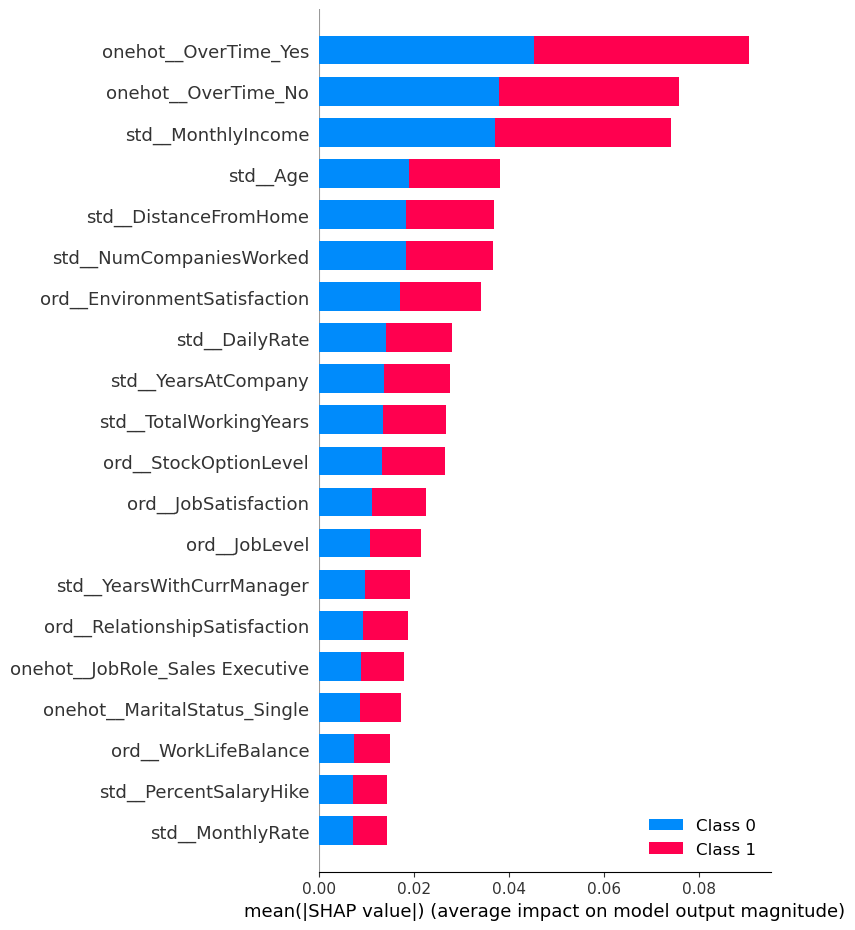

In [141]:
shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names_RF, max_display=10,show = False)
plt.savefig('../figures/shap-global.png', dpi=300,bbox_inches='tight')
plt.show()

In [38]:
index = 1 # the index of the point to explain
print(explainer.expected_value[1]) # we explain class 0 predictions


shap.force_plot(explainer.expected_value[1], shap_values[1][index,:], features = X_test_transformed[index,:],feature_names = feature_names_RF,show=False,matplotlib=True).savefig('../figures/shap-local.png', format = "png",dpi = 500, bbox_inches='tight')



0.1606802721088435


In [46]:
index = 1 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions


shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names_RF)



0.8393197278911566


In [28]:
plt.gcf()
plt.show()

<Figure size 640x480 with 0 Axes>

In [239]:
feature_names = X.columns

In [67]:
# stratified K Fold: variation in balance is very small (4th decimal point)
from sklearn.model_selection import StratifiedKFold
random_state = 42

X = df.drop(columns = ['Attrition'])
y = df[['Attrition']]

# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(np.unique(y_train,return_counts=True))
    print(np.unique(y_val,return_counts=True))




X = df.drop(columns = ['Attrition'])
y = df[['Attrition']]

std_ftrs = ['Age','DailyRate', 'DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked', 'YearsAtCompany','YearsSinceLastPromotion','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager','PercentSalaryHike','EmployeeNumber']
ordinal_ftrs = ['Education', 'EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear','WorkLifeBalance','JobLevel']
ordinal_cats =[['1','2','3','4','5'],['1','2','3','4'],['1','2','3','4'],['1','2','3','4'],['1','2','3','4'],['1','2','3','4'],['0','1','2','3'],['0','1','2','3','4','5','6'],['1','2','3','4'],['1','2','3','4','5']]
onehot_ftrs = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])


test balance: (array(['No', 'Yes'], dtype=object), array([247,  47]))
new fold
(array(['No', 'Yes'], dtype=object), array([788, 152]))
(array(['No', 'Yes'], dtype=object), array([198,  38]))
new fold
(array(['No', 'Yes'], dtype=object), array([789, 152]))
(array(['No', 'Yes'], dtype=object), array([197,  38]))
new fold
(array(['No', 'Yes'], dtype=object), array([789, 152]))
(array(['No', 'Yes'], dtype=object), array([197,  38]))
new fold
(array(['No', 'Yes'], dtype=object), array([789, 152]))
(array(['No', 'Yes'], dtype=object), array([197,  38]))
new fold
(array(['No', 'Yes'], dtype=object), array([789, 152]))
(array(['No', 'Yes'], dtype=object), array([197,  38]))


In [69]:



clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()
df_train = pd.DataFrame(data=X_train_prep,columns=feature_names)

X_val_prep = clf.transform(X_val)
df_CV = pd.DataFrame(data=X_val_prep,columns = feature_names)

X_test_prep = clf.transform(X_test)
df_test = pd.DataFrame(data=X_test_prep,columns = feature_names)

print(df_train.shape)
print(df_CV.shape)
print(df_test.shape)

print(df_train)
print(df_CV)
print(df_test)


(941, 52)
(235, 52)
(294, 52)
     ord__Education  ord__EnvironmentSatisfaction  ord__JobInvolvement  \
0               3.0                           1.0                  3.0   
1               0.0                           2.0                  2.0   
2               0.0                           0.0                  2.0   
3               0.0                           1.0                  2.0   
4               4.0                           3.0                  2.0   
..              ...                           ...                  ...   
936             3.0                           2.0                  2.0   
937             2.0                           2.0                  2.0   
938             1.0                           1.0                  2.0   
939             3.0                           3.0                  2.0   
940             2.0                           2.0                  2.0   

     ord__JobSatisfaction  ord__PerformanceRating  \
0                     1.0   

,ord__Education,ord__EnvironmentSatisfaction,ord__JobInvolvement,ord__JobSatisfaction,ord__PerformanceRating,ord__RelationshipSatisfaction,ord__StockOptionLevel,ord__TrainingTimesLastYear,ord__WorkLifeBalance,ord__JobLevel,...,std__MonthlyRate,std__NumCompaniesWorked,std__YearsAtCompany,std__YearsSinceLastPromotion,std__TotalWorkingYears,std__YearsInCurrentRole,std__YearsWithCurrManager,std__PercentSalaryHike,std__EmployeeNumber,Attrition
0,3.0,1.0,3.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,...,0.941970,1.313464,-0.671238,-0.361387,2.213308,-0.636590,-0.625671,-0.326042,1.148322,NaN
1,0.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,0.0,...,0.693873,-1.081053,-0.832000,-0.051391,-1.084548,-0.915859,-0.901565,-0.326042,-1.390681,No
2,0.0,0.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,3.0,...,0.179770,0.116206,0.775622,0.568600,1.452264,1.318291,1.305583,-0.868100,0.218309,NaN
3,0.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0,...,1.676404,-0.681966,-0.028189,-0.671383,-0.577185,-0.078053,0.477903,-1.139130,-0.588714,NaN
4,4.0,3.0,2.0,2.0,2.0,1.0,1.0,3.0,2.0,1.0,...,0.739411,0.116206,0.132573,0.568600,-0.196664,0.759753,0.753796,-0.597071,-0.558387,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [72]:
processed_data = pd.concat([df_train,df_CV,df_test],axis=0)


In [74]:
processed_data.to_csv('../data/processed_data.csv')
